## Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

boston = load_boston()
print(boston.data.shape)

(506, 13)


# Gather data

[Source: Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston()
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [4]:
boston_dataset.data.shape

(506, 13)

# Data exploration with Pandas Dataframes

In [5]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add column with the price(target)
data['price'] = boston_dataset.target

In [6]:
data.head() #the top rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
price      506
dtype: int64

## Cleaning data - check for missing values

In [8]:
# Check for any null value (pandas way)
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
price      False
dtype: bool

In [9]:
# Check for any null value (the dataframe way)
data.info()
data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
price      506
dtype: int64

# Visualizing Data - Histograms, Distributions & Bar Charts

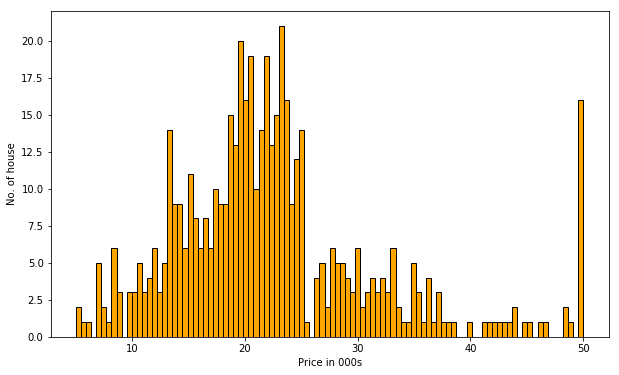

In [10]:
plt.figure(figsize=(10,6))
plt.hist(data['price'], bins=100, ec='black', color="orange")
plt.xlabel('Price in 000s')
plt.ylabel('No. of house')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


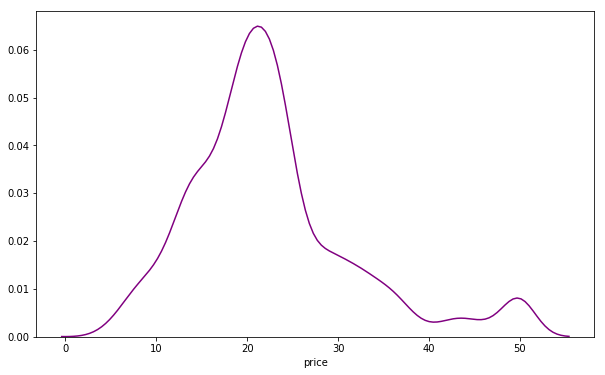

In [11]:
# Probability density function
plt.figure(figsize=(10,6))
sns.distplot(data['price'], bins=50, hist=False, color="purple")
plt.show()

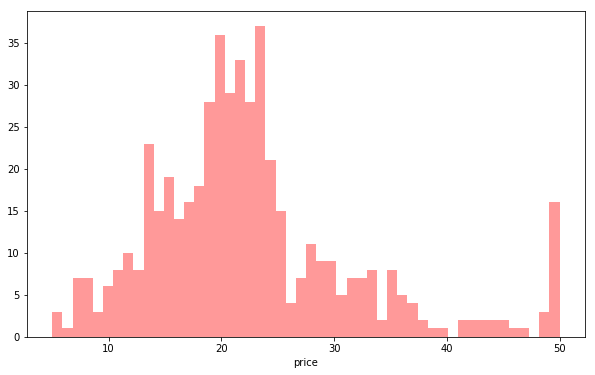

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(data['price'], bins=50, kde=False, color="red")
plt.show()

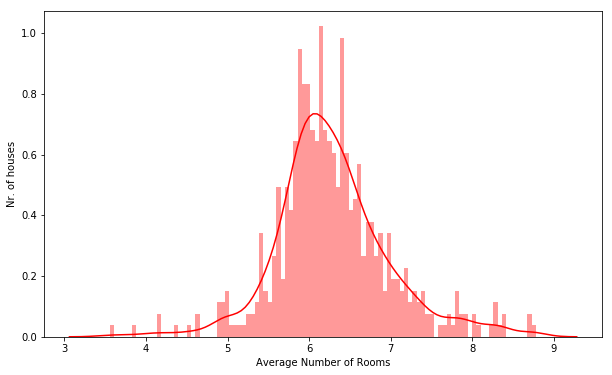

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(data['RM'], bins=100, color="red")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Nr. of houses")
plt.show()

# The area under probability density function needs to be equal to 1 

In [14]:
data['RM'].mean()

6.284634387351787

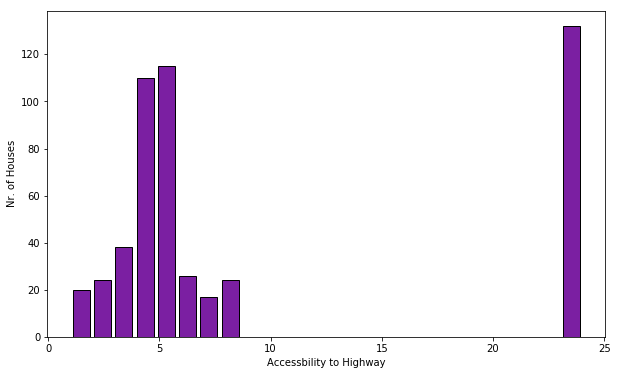

In [15]:
# Create a meaningful histogram for RAD using matplotlib ... in royal purple
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], ec='black', color='#7b1fa2', bins=24, rwidth=0.8) # bar will have a width of 0.8 of its original width
plt.xlabel('Accessbility to Highway')
plt.ylabel('Nr. of Houses')
plt.show()

In [16]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

Text(0, 0.5, 'Nr. of Houses')

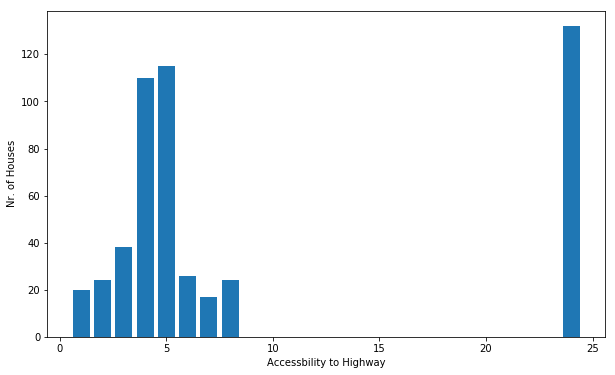

In [17]:
frequency = data['RAD'].value_counts()
frequency.index
frequency.axes
plt.figure(figsize=(10,6))
plt.bar(frequency.index, height=frequency)
plt.xlabel('Accessbility to Highway')
plt.ylabel('Nr. of Houses')

In [18]:
data['CHAS'].value_counts()
data['CHAS'].value_counts().index # The value on the left / x


Float64Index([0.0, 1.0], dtype='float64')

In [19]:
data['price'].min()
data.describe() # Generate descriptive statistics such as mean, mode and median

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y) $$ 

## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [20]:
## Finding the correlation between number of rooms and price of the property
data['price'].corr(data['RM'])

0.695359947071539

In [21]:
# Challenge: Correlation between property prices and the pupil teacher ratio
data['price'].corr(data['PTRATIO'])

-0.5077866855375615

In [22]:
# Find the Pearson correlation coeeficients between all the data
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [23]:
import numpy as np
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

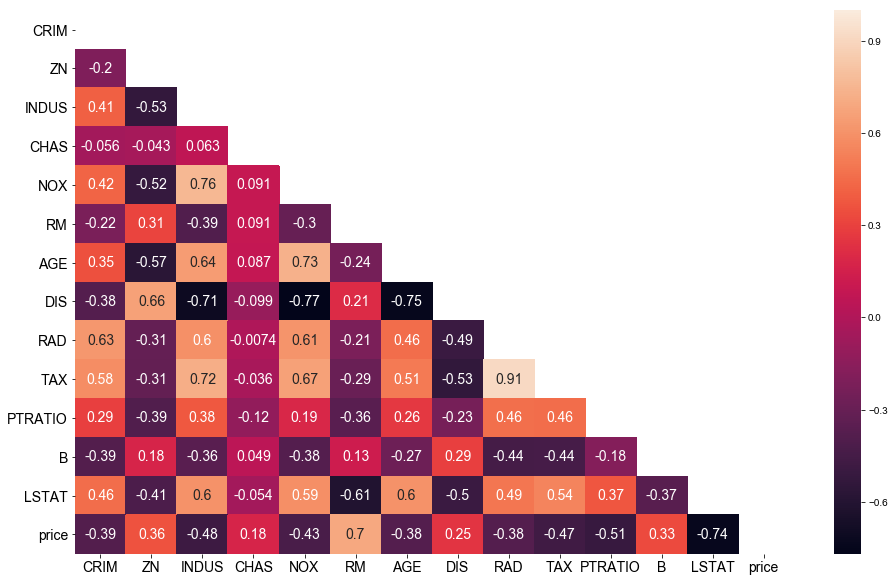

In [24]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.show()

In [25]:
# At the heatmap: 1. Check strength & direction & ask yourself: Does this correlation make sense?
# At the hearmap: 2. Check correlations with target: Find correlation close to 0 (feature that has no relationship with target)
# Correlation is only valid for continuous data, not valid for discrete data
# Hence, correlation of discrete data is not counted

# General to-dos after finding out the correlation: 
#1 Identified strong correlations
#2. Simplify by excluding irrelevant data (eg: Data/ feature that has little collinear with target)
#- So in this example, Check if Distance feature make our model better or worse since Distance has little collinear with target
#3. Test for multicollinearity


# Correlation doesn't implied causation, meaning one feature impact another feature

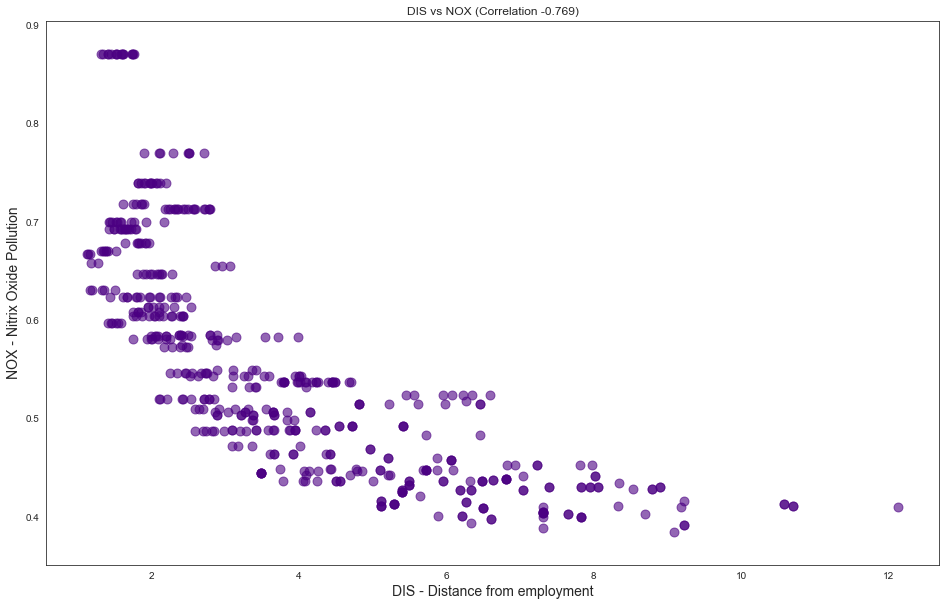

In [26]:
# Challenge: Picture the relationship between pollution and distance in your head
# Then create a scatter plto between DIS and NOX

nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(16,10))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.6, s=80, color='indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})')
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitrix Oxide Pollution', fontsize=14)
plt.show()

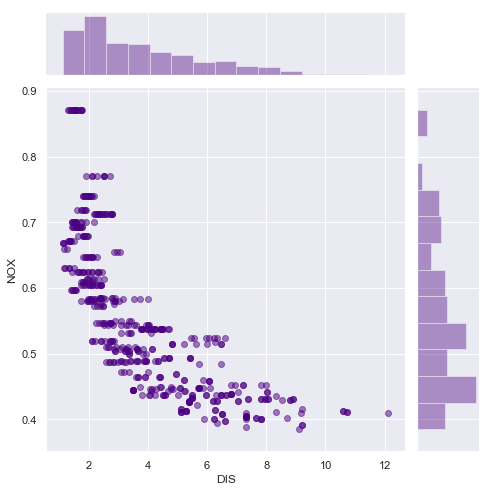

In [27]:
sns.set()
#sns.set_context('talk')
sns.set_style(style='darkgrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha': 0.5}, kind='scatter')
plt.show()

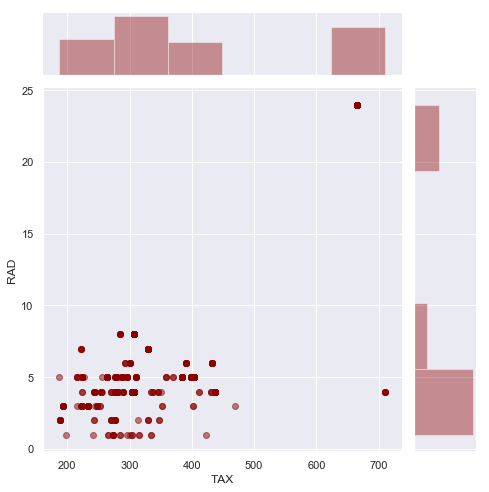

In [28]:
sns.set()
#sns.set_context('talk')
sns.set_style(style='darkgrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='darkred', joint_kws={'alpha': 0.5}, kind='scatter')
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


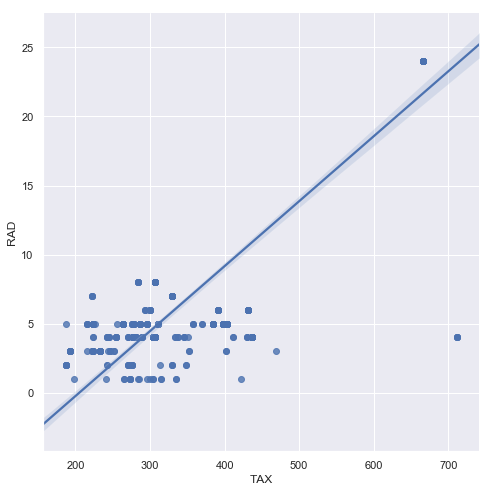

In [29]:
sns.lmplot(x='TAX', y='RAD', data=data, size=7)
plt.show()

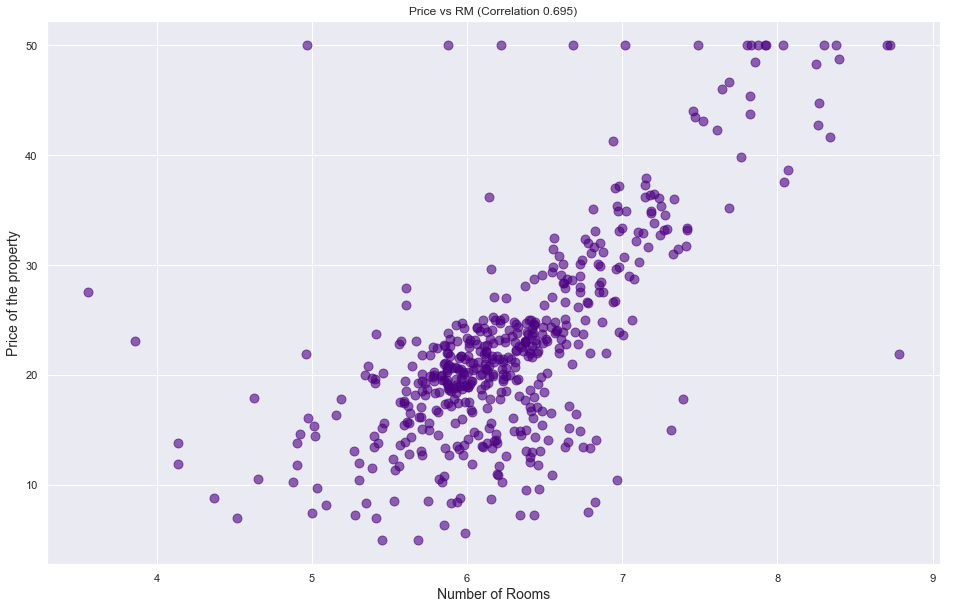

In [30]:
# Challenge: Create a scatter plot between the house prices and the number of rooms (RM)

price_rm_corr = round(data['price'].corr(data['RM']), 3)

plt.figure(figsize=(16,10))
plt.scatter(x=data['RM'], y=data['price'], alpha=0.6, s=80, color='indigo')
plt.title(f'Price vs RM (Correlation {price_rm_corr})')
plt.xlabel('Number of Rooms', fontsize=14)
plt.ylabel('Price of the property', fontsize=14)
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


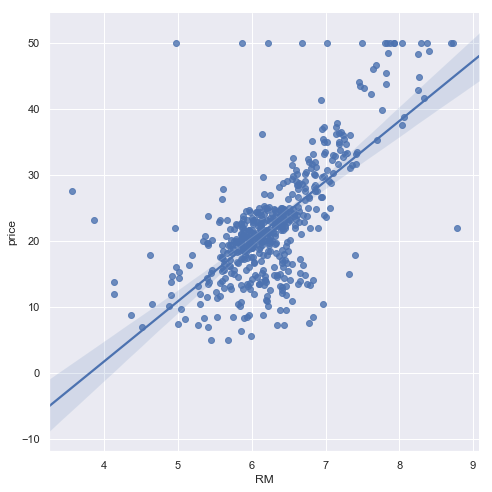

In [31]:
sns.lmplot(x='RM', y='price', data=data,size=7)

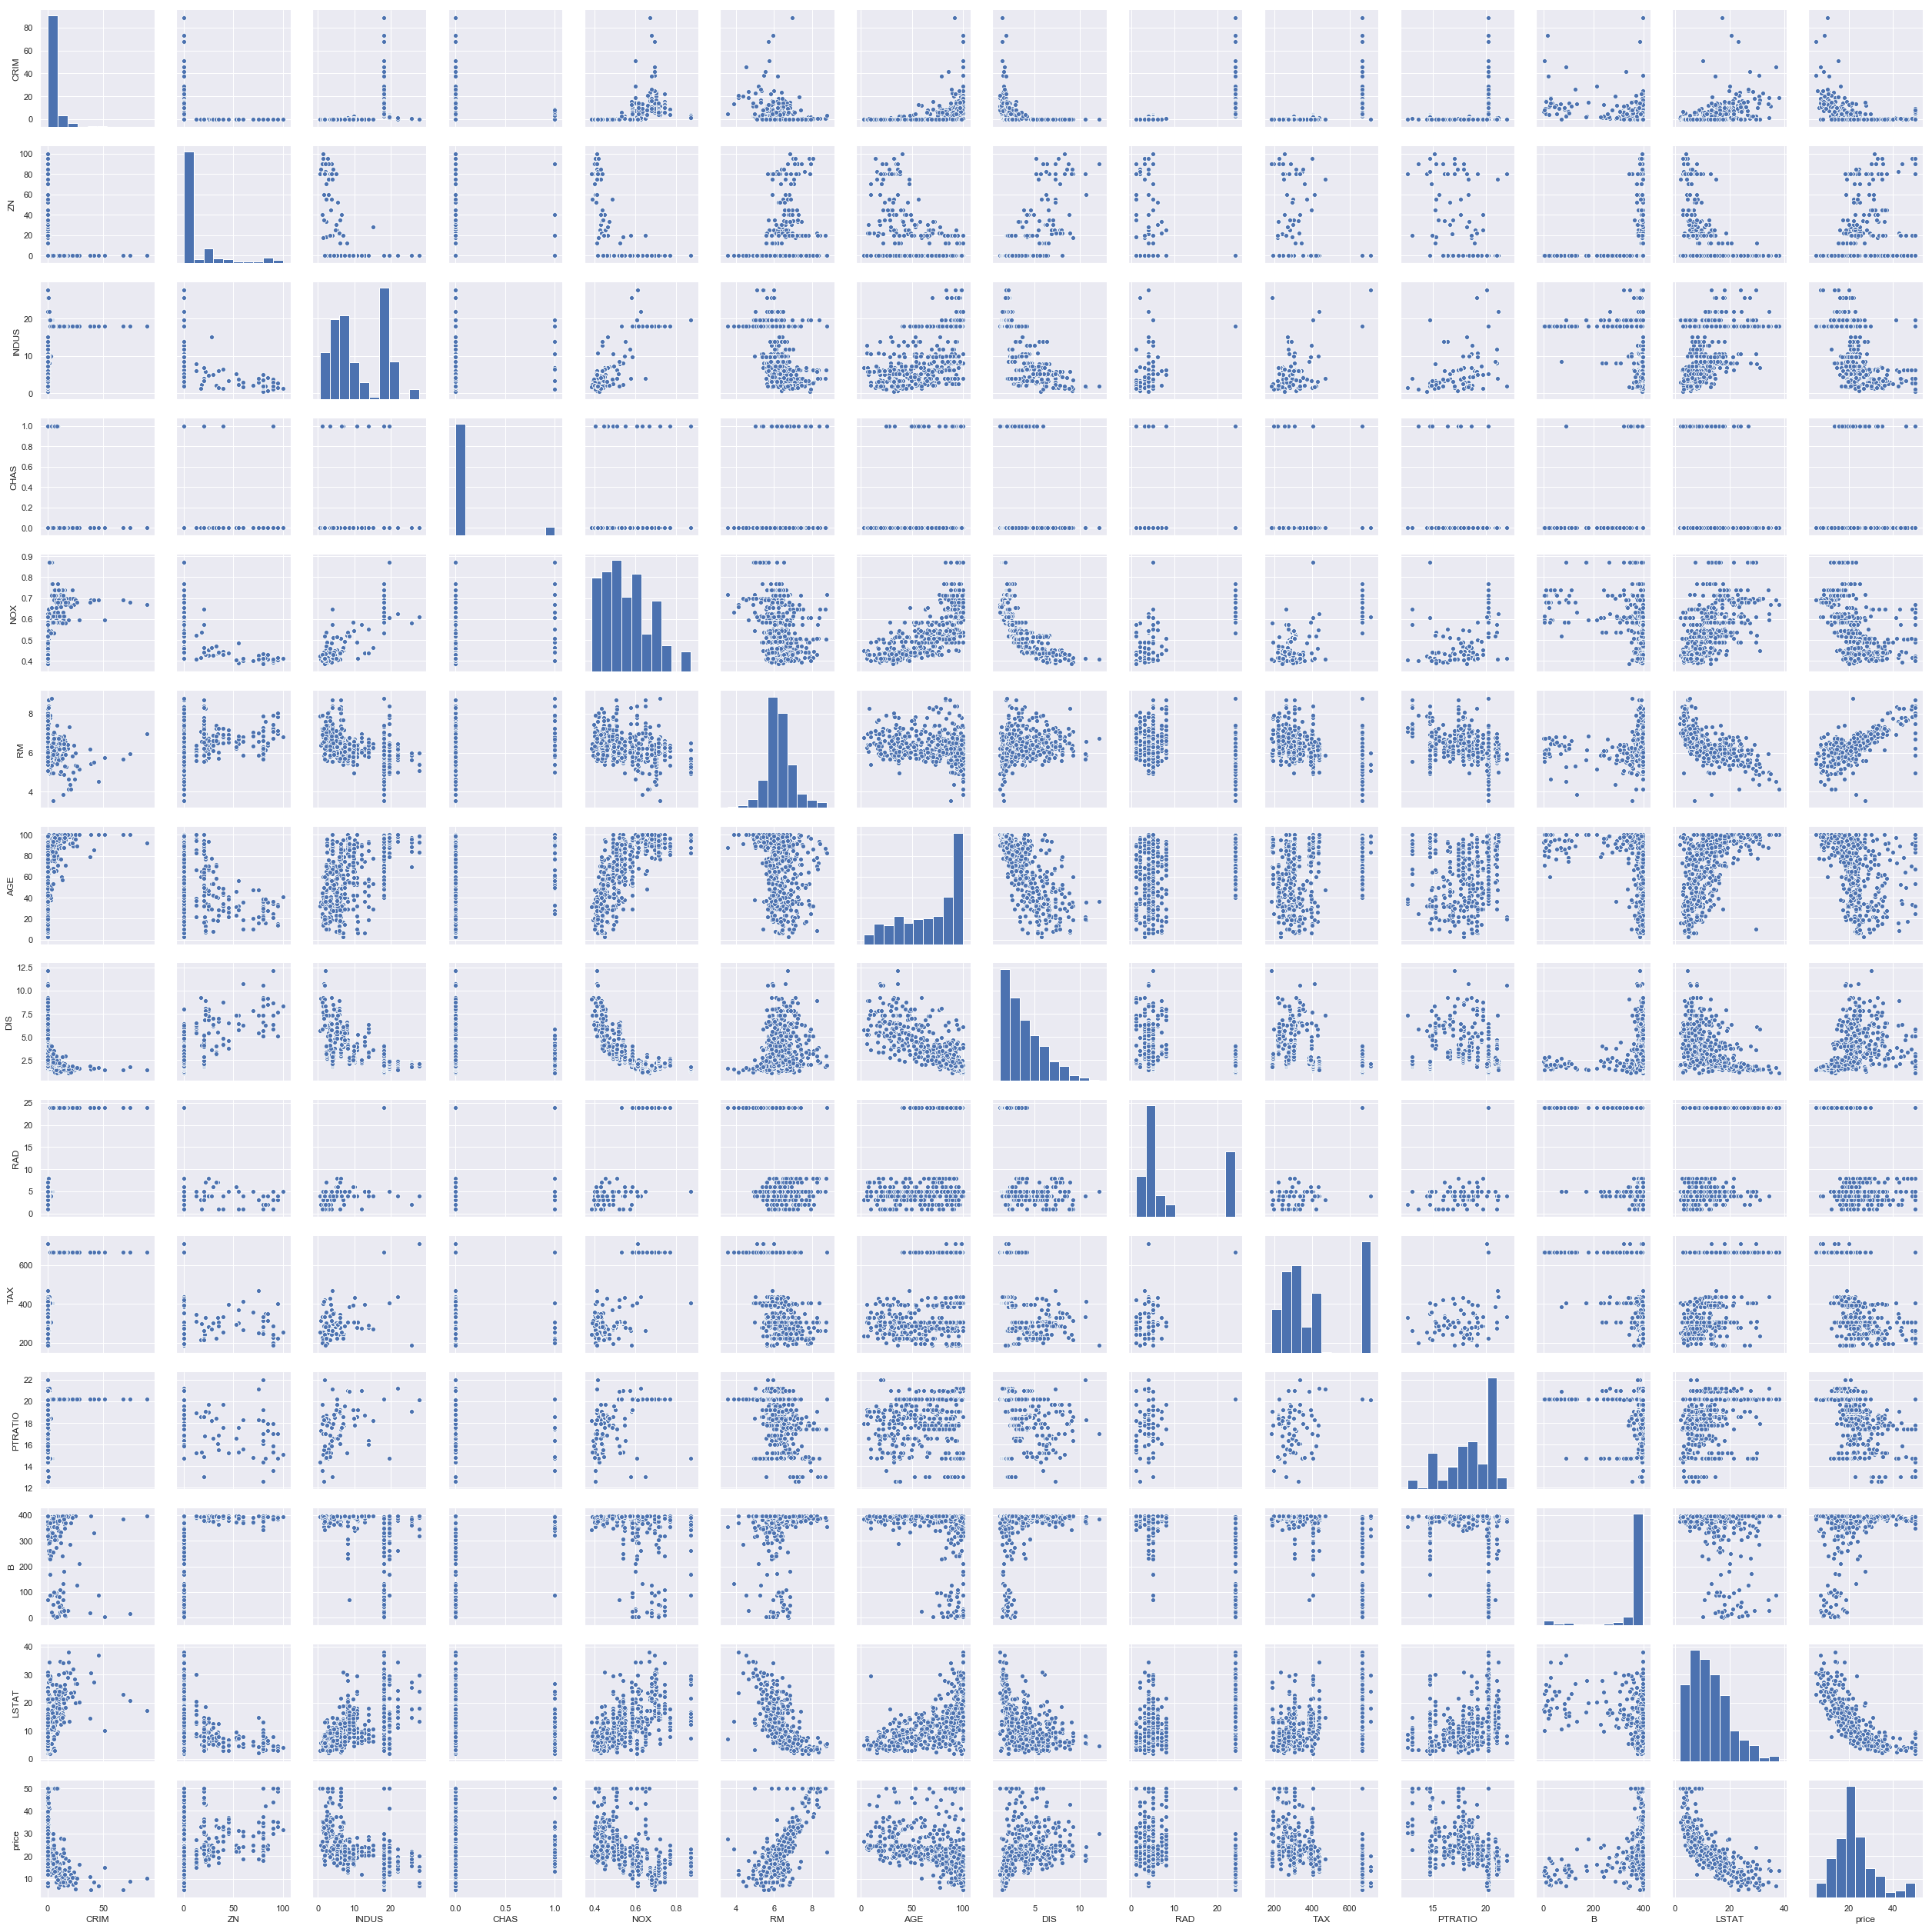

CPU times: user 36.4 s, sys: 1.61 s, total: 38 s
Wall time: 1min 18s


In [32]:
%%time

sns.pairplot(data)
plt.show()

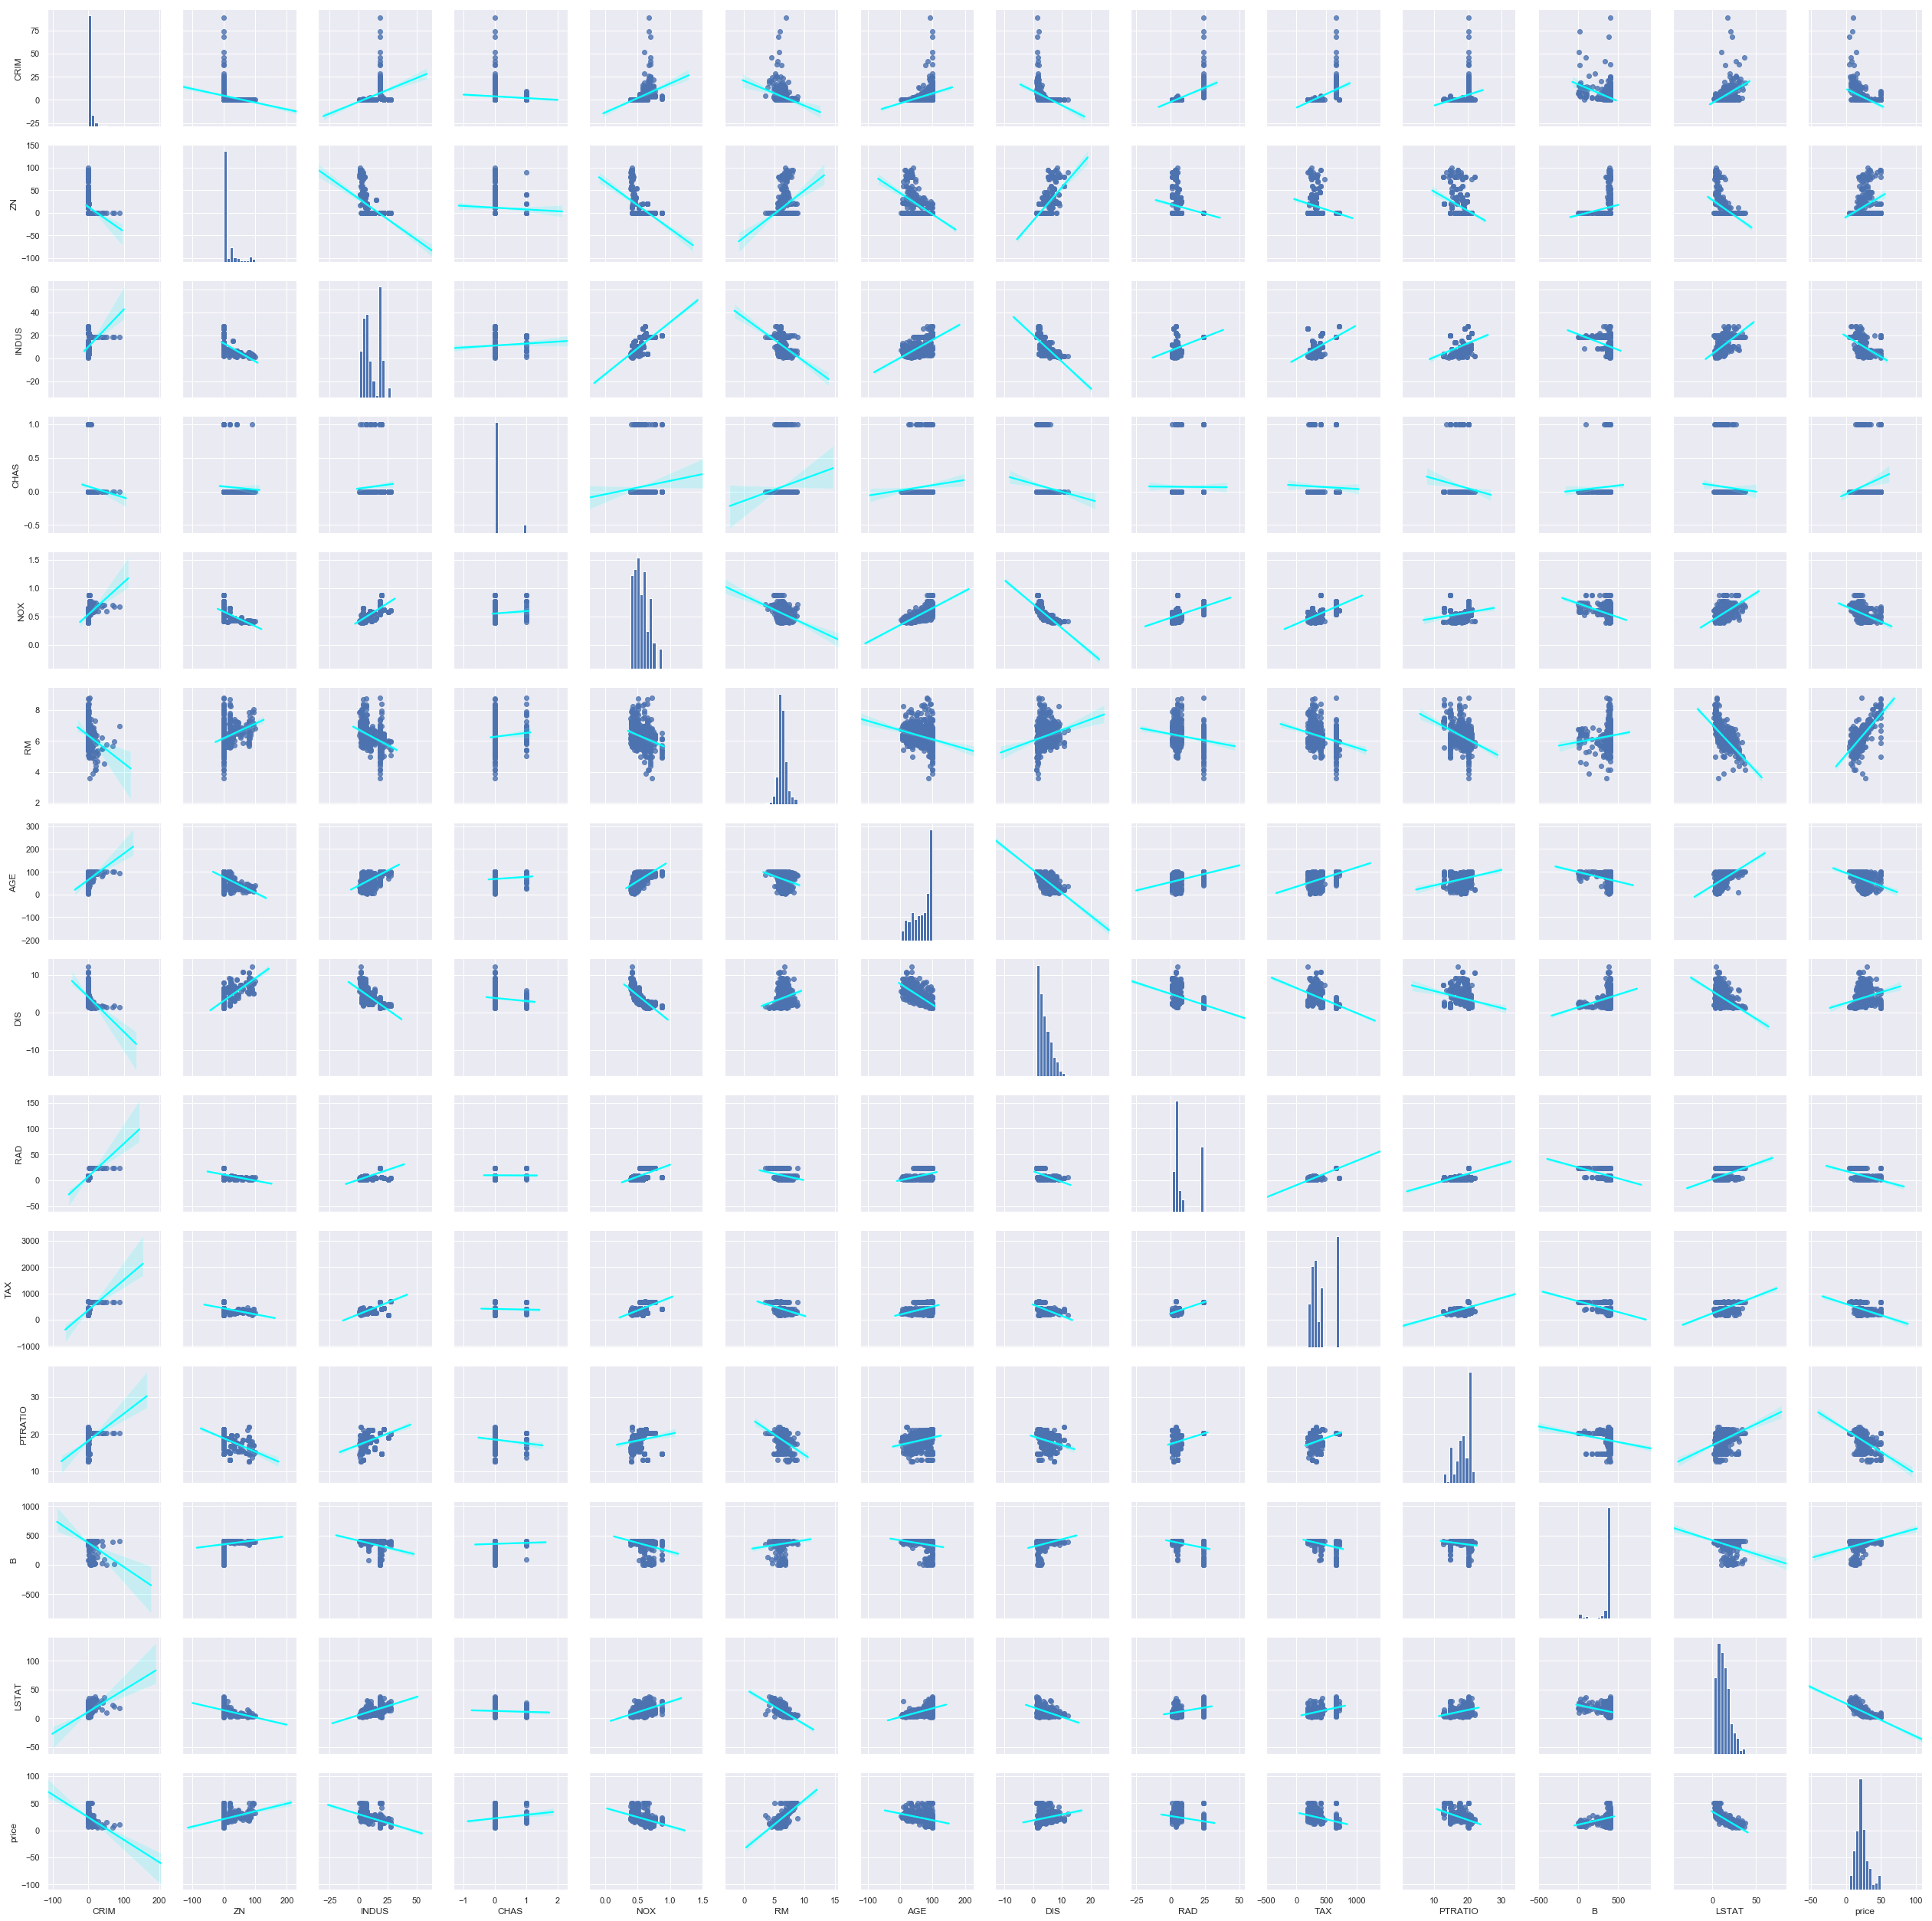

CPU times: user 1min 35s, sys: 1.88 s, total: 1min 37s
Wall time: 1min 20s


In [33]:
%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws': {'color': 'cyan'}}) # 'reg' stands for regression line
plt.show()

# So After Data Exploration -> Lets get into Model:


### Split Training & Test Data

In [34]:
prices = data['price']
features = data.drop('price', axis=1)

# use train_test_split from sklearn 

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10) # test dataset will be 20% of the total


In [37]:
regr = LinearRegression()
regr.fit(X_train, y_train) # regr.fit(training_features, training_lablels)

print("Intercept", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082
